# 5. Model Inspection


In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import angorapy as apy
import numpy as np
from bokeh.io import output_notebook, show

from angorapy.utilities.monitor import training_plots as plots
output_notebook()

agent = apy.agent.PPOAgent.from_agent_state(1679142835973298, from_iteration="best")
investigator = apy.analysis.Investigator.from_agent(agent)

Invalid MIT-MAGIC-COOKIE-1 keyBokehDeprecationWarning: HSL() was deprecated in Bokeh 2.3.1 and will be removed, use RGB() or named colors instead.


Loading BokehJS ...

Detected 0 GPU devices.
Loading from iteration best.
Detected 0 GPU devices.
Using [StateNormalizationTransformer, RewardNormalizationTransformer] for preprocessing.


/home/weidler/workspace/angorapy-tutorials/venv/lib/python3.8/site-packages/gym/envs/registration.py:623: UserWarning: WARN: The environment is being initialised with mode (rgb_array) that is not in the possible render_modes ([]).
  logger.warn(


An MPI Optimizer with 1 ranks has been created; the following ranks optimize: [0]
An MPI Optimizer with 1 ranks has been created; the following ranks optimize: [0]
Loaded optimizer.


## Learning Curves & Statistics
First things first, let us see how training of this agent went. We can easily plot the reward over training cycles, as follows

In [2]:
reward_plot = plots.plot_reward_progress({"mean": agent.cycle_reward_history, "stdev": agent.cycle_reward_std_history} , [])
show(reward_plot)

And the same we can do with the average episode length per cycle.

In [3]:
length_plot = plots.plot_length_progress({"mean": agent.cycle_length_history, "stdev": agent.cycle_length_std_history}, [])
show(length_plot)

## Evaluation

The above plots already show how performance progressed throughout training. Note, however, that AngoraPy trains agents with stochastic policies and, during training, encourages exploration. Thus, the above performance at every cycle is not entirely representative of the agents true potential. To evaluate its real performance, let us run 10 episodes without random exploration.

In [4]:
stats_eval = agent.evaluate(1, act_confidently=True)[0]  # todo act confidently

100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


In [5]:
print(f"Reward: {np.mean(stats_eval.episode_rewards)} +/- {np.std(stats_eval.episode_rewards)}")
print(f"Consecutive goals reached: {np.mean(stats_eval.auxiliary_performances['consecutive_goals_reached'])} +/- {np.std(stats_eval.auxiliary_performances['consecutive_goals_reached'])}")

Reward: 19.488275579942666 +/- 0.0
Consecutive goals reached: 3.0 +/- 0.0


## Rendering
Lastly, let us inspect qualitatively the behaviour of the agent, by rendering an episodes. The following renders directly in the jupyter notebook. If you are running the jupyter notebook locally or want to render in a script, call render_episode() instead of render_episode_jupyter() and set the render_mode of the environment to "human".

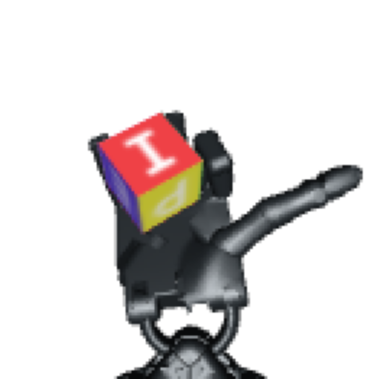

In [6]:
env = apy.make_env(agent.env.spec.id, transformers=agent.env.transformers, render_mode="rgb_array")
investigator.render_episode_jupyter(env)

To summarize, we have seen in this tutorial how we can
- plot the performance of an agent
- evaluate an agent
- render an episode